In [ ]:
# Downloading the Dataset from Kaggle by using opendatasets API
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [ ]:
# download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
# od.download(download_url)

In [3]:
# Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('us-accidents/US_Accidents_Dec21_updated.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# Splitting Start_Time varible by date and time, 
df[['Date','Time']] = df['Start_Time'].str.split(expand=True)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,Night,Night,Night,Night,2016-02-08,00:37:08
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,Night,Night,Night,Night,2016-02-08,05:56:20
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,Night,Night,Night,Day,2016-02-08,06:15:39
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,Night,Night,Day,Day,2016-02-08,06:51:45
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,Day,Day,Day,Day,2016-02-08,07:53:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,Day,Day,Day,Day,2019-08-23,18:03:25
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,Day,Day,Day,Day,2019-08-23,19:11:30
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,Day,Day,Day,Day,2019-08-23,19:00:21
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,Day,Day,Day,Day,2019-08-23,19:00:21


In [7]:
# Splitting date into month, year and day 
df[['Year', 'Month', 'Day']] = df['Date'].str.split(pat = "-", expand=True) 
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time,Year,Month,Day
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,Night,Night,Night,Night,2016-02-08,00:37:08,2016,02,08
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,Night,Night,Night,Night,2016-02-08,05:56:20,2016,02,08
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,Night,Night,Night,Day,2016-02-08,06:15:39,2016,02,08
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,Night,Night,Day,Day,2016-02-08,06:51:45,2016,02,08
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,Day,Day,Day,Day,2016-02-08,07:53:43,2016,02,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,Day,Day,Day,Day,2019-08-23,18:03:25,2019,08,23
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,19:11:30,2019,08,23
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019,08,23
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019,08,23


In [8]:
# Deleting data from years 2016 and 2017, then counting number of values
# df_final is final dataframe including data from year 2018 to 2021

df_final = df[(df['Year'] != '2016') & (df['Year'] != '2017')]
df_final['Year'].value_counts()

2021    1511745
2020     625864
2019     258615
2018     163176
Name: Year, dtype: int64

In [9]:
# Creating databases for variables needed for each question: 
# Q1
q1_df = df_final[['ID','Year']]

# Q2
q2_df = df_final[['ID','Precipitation(in)','Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition', 'Year']]

# Q3
q3_df = df_final[['ID','State', 'City', 'Timezone', 'End_Lat', 'End_Lng','Year']]

# Q4
q4_df = df_final[['ID','Time','Sunrise_Sunset','Year']]

We saved a dataframe separately for each research question so each team member can work with just the data needed instead of having to download the large original dataset. 

In [10]:
# drop rows containing missing values for Q1 - Trends of accident before/during pandemic
q1_df_cleaned = q1_df.dropna()
q1_df_cleaned
q1_df_cleaned.to_csv("Q1_Year_data.csv")

In [11]:
# drop rows containing missing values for Q2 - Effect of environmental factors on the trend of accidents
q2_df_cleaned = q2_df.dropna()
q2_df_cleaned
q2_df_cleaned.to_csv("Q2_Weather_data.csv")

In [12]:
# drop rows containing missing values for Q3 - Accidents by regions (cities, timezone)
q3_df_cleaned = q3_df.dropna()
q3_df_cleaned
q3_df_cleaned.to_csv("Q3_location_data.csv")

In [13]:
# drop rows containing missing values for Q4 - Did time of day increase the likelihood of accidents?
q4_df_cleaned = q4_df.dropna()
q4_df_cleaned
q4_df_cleaned.to_csv("Q4_Time_data.csv")

Question 1: Did the number of road traffic accidents increase or decrease during Covid-19 (2020 - 2021) compared to before Covid-19 (2018 - 2019)?

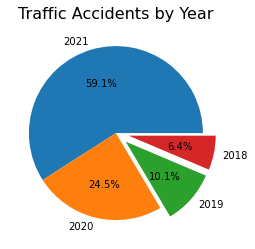

In [14]:
# Question # 1

# Pie chart
explode = [0, 0, 0.15, 0.15]
q1_df_cleaned["Year"].value_counts().plot(kind="pie", explode = explode, autopct="%1.1f%%")
plt.title("Traffic Accidents by Year", size = 16)
plt.ylabel('')
plt.savefig("Accident_by_year.png", bbox_inches='tight', dpi=300)
plt.show()

Qestion 2: How does environmental variables (visibility, precipitation, and temperature) affect the number of traffic accidents before and during Covid-19?

In [18]:
#read in file to convert year column to int then convert columns names for easier graphing
q2_df_cleaned = pd.read_csv("Q2_Weather_data.csv")
q2_df_cleaned.rename(columns={'Precipitation(in)': 'Precipitation', 'Temperature(F)': 'Temperature',
                   "Visibility(mi)": "Visibility"}, inplace=True)

In [19]:
#splitting data for pre and during covid analysis
q2_pre = q2_df_cleaned.loc[(q2_df_cleaned['Year'] <= 2019)]
q2_pre

q2_dur = q2_df_cleaned.loc[(q2_df_cleaned['Year'] > 2019)]
q2_dur

,Unnamed: 0,ID,Precipitation,Temperature,Visibility,Precipitation(in).1,Weather_Condition,Year
0,224945,A-224946,0.0,42.0,10.0,0.0,Fair,2021
1,224946,A-224947,0.0,54.0,2.0,0.0,Fog,2021
2,224947,A-224948,0.0,79.0,10.0,0.0,Mostly Cloudy,2021
3,224948,A-224949,0.0,38.0,10.0,0.0,Cloudy,2021
4,224949,A-224950,0.0,52.0,10.0,0.0,Fair,2021
...,...,...,...,...,...,...,...,...
2010504,2362656,A-2362657,0.0,50.0,10.0,0.0,Fair,2020
2010505,2362658,A-2362659,0.0,43.0,5.0,0.0,Fair,2020
2010506,2362659,A-2362660,0.0,64.0,10.0,0.0,Fair,2020
2019772,2372960,A-2372961,0.0,28.0,7.0,0.0,Cloudy,2020


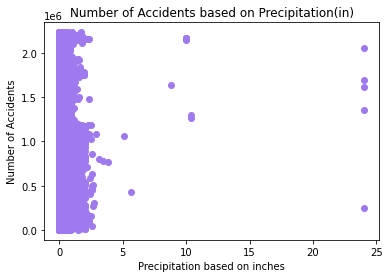

In [21]:
#combined precipitation of pre and during covid
x_axis = q2_df_cleaned["Precipitation"]
y_axis = np.arange(len(q2_df_cleaned["Precipitation"]))
plt.scatter(x_axis, y_axis, color = '#9F79EE')
plt.title("Number of Accidents based on Precipitation(in)")
plt.xlabel("Precipitation based on inches")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Precipitation(in).png")

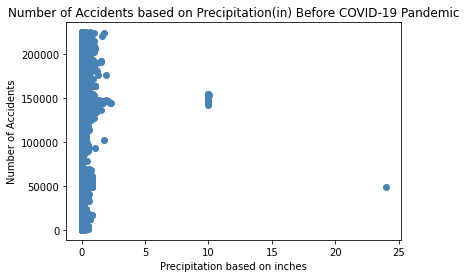

In [22]:
#precipitation of pre covid
x_axis = q2_pre["Precipitation"]
y_axis = np.arange(len(q2_pre["Precipitation"]))
plt.scatter(x_axis, y_axis, color='#4682B4')
plt.title("Number of Accidents based on Precipitation(in) Before COVID-19 Pandemic")
plt.xlabel("Precipitation based on inches")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Precipitation(in) Before COVID-19 Pandemic.png")

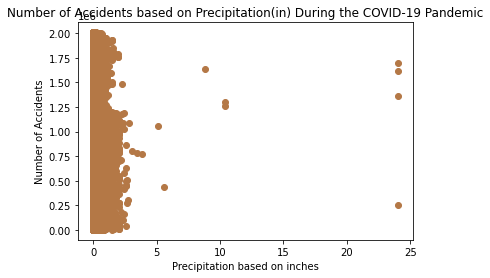

In [23]:
#precipitation of during covid
x_axis = q2_dur["Precipitation"]
y_axis = np.arange(len(q2_dur["Precipitation"]))
plt.scatter(x_axis, y_axis, color='#B47846')
plt.title("Number of Accidents based on Precipitation(in) During the COVID-19 Pandemic")
plt.xlabel("Precipitation based on inches")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Precipitation(in) During COVID-19 Pandemic.png")

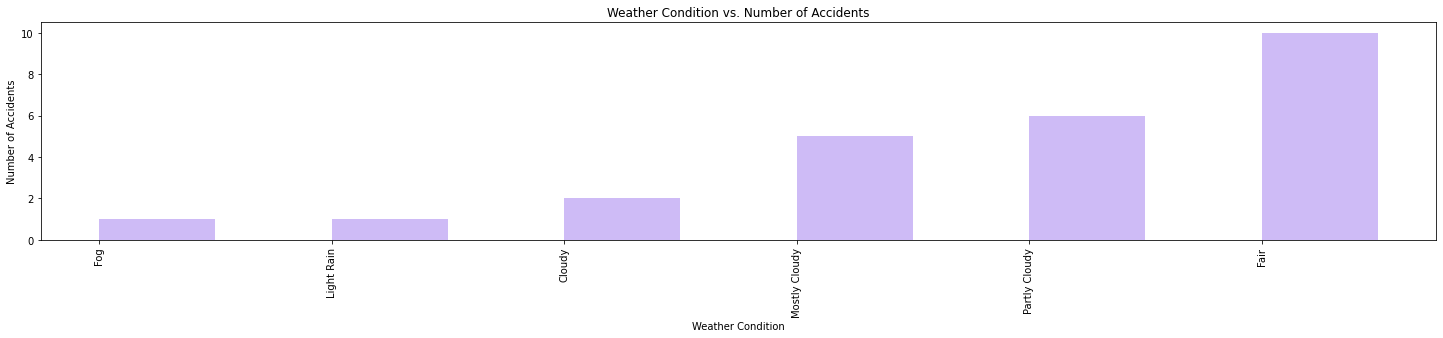

In [24]:
#weather condition analysis, of 6 most prominent weather conditions, combined pre and during covid data 
q2_df_cleaned.Weather_Condition.head(25).value_counts().sort_values().plot(kind = 'bar', figsize=(25,4), 
                                                                           alpha=0.5, align="edge", color = '#9F79EE' )
plt.title("Weather Condition vs. Number of Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.savefig("Weather Condition vs. Number of Accidents.png")

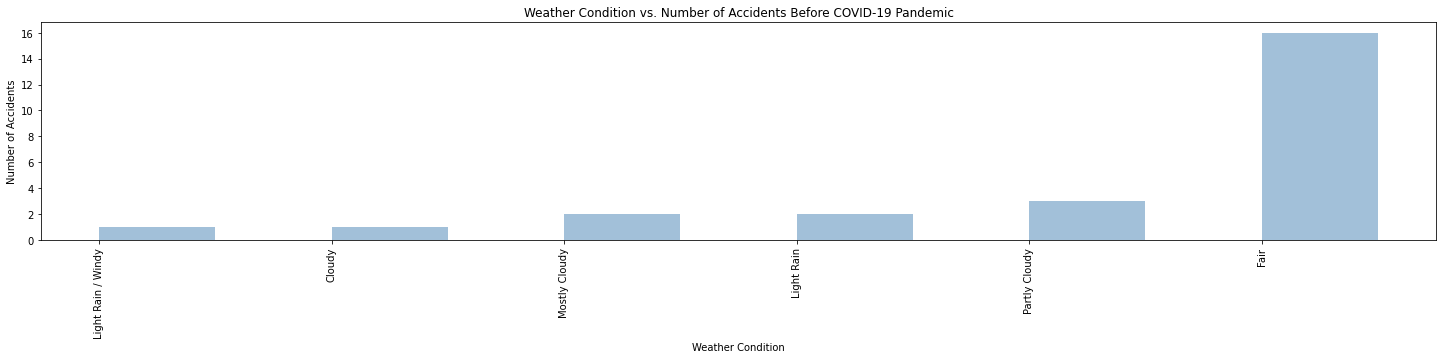

In [25]:
#weather condition analysis, of 6 most prominent weather conditions,  pre covid data 
q2_pre.Weather_Condition.head(25).value_counts().sort_values().plot(kind = 'bar', figsize=(25,4), 
                                                                           alpha=0.5, align="edge", color = '#4682B4')
plt.title("Weather Condition vs. Number of Accidents Before COVID-19 Pandemic")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.savefig("Weather Condition vs. Number of Accidents Before COVID-19 Pandemic.png")

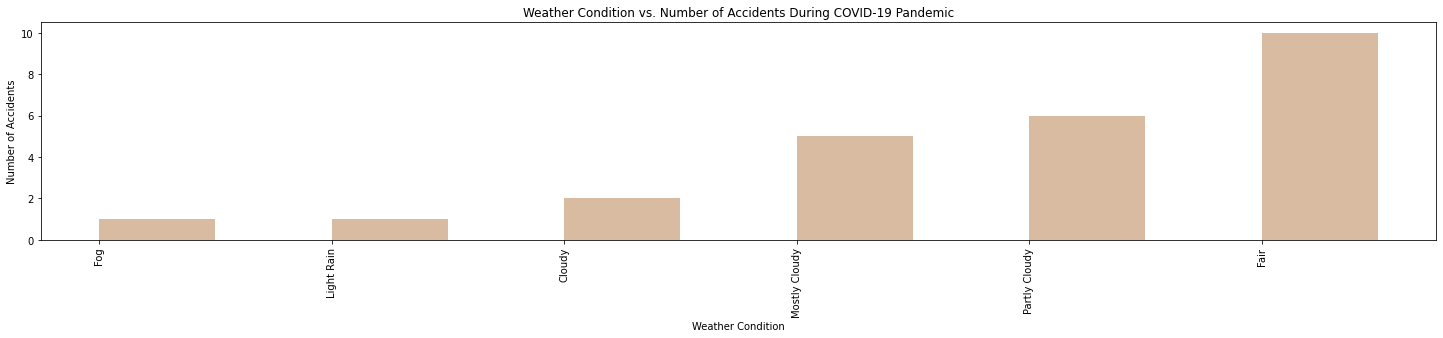

In [26]:
#weather condition analysis, of 6 most prominent weather conditions,  during covid data 
q2_dur.Weather_Condition.head(25).value_counts().sort_values().plot(kind = 'bar', figsize=(25,4), 
                                                                           alpha=0.5, align="edge", color = '#B47846')
plt.title("Weather Condition vs. Number of Accidents During COVID-19 Pandemic")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.savefig("Weather Condition vs. Number of Accidents During COVID-19 Pandemic.png")

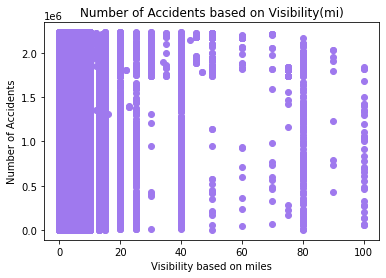

In [27]:
#visibility analysis, combined before and during covid data
x_axis = q2_df_cleaned["Visibility"]
y_axis = np.arange(len(q2_df_cleaned["Visibility"]))
plt.scatter(x_axis, y_axis, color = '#9F79EE' )
plt.title("Number of Accidents based on Visibility(mi)")
plt.xlabel("Visibility based on miles")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Visibility.png")

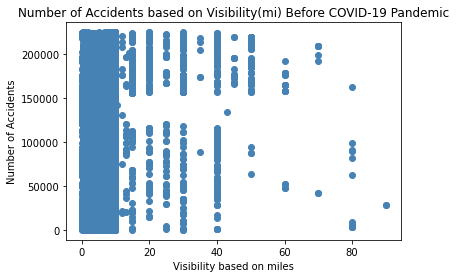

In [28]:
#visibility analysis, before covid data
x_axis = q2_pre["Visibility"]
y_axis = np.arange(len(q2_pre["Visibility"]))
plt.scatter(x_axis, y_axis, color = '#4682B4')
plt.title("Number of Accidents based on Visibility(mi) Before COVID-19 Pandemic")
plt.xlabel("Visibility based on miles")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Visibility(mi) Before COVID-19 Pandemic.png")

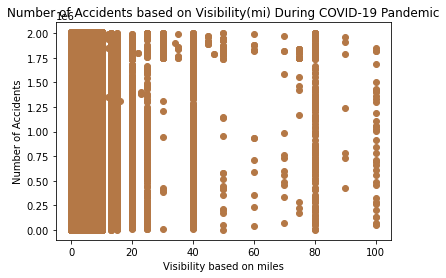

In [29]:
#visibility analysis, during covid data
x_axis = q2_dur["Visibility"]
y_axis = np.arange(len(q2_dur["Visibility"]))
plt.scatter(x_axis, y_axis, color = '#B47846')
plt.title("Number of Accidents based on Visibility(mi) During COVID-19 Pandemic")
plt.xlabel("Visibility based on miles")
plt.ylabel("Number of Accidents")
plt.savefig("Number of Accidents based on Visibility(mi) During COVID-19 Pandemic.png")

In [30]:
#temperature, prioritizing top temperature values for analysis, combined data
temp = q2_df_cleaned.Temperature.value_counts()
temp =temp.head(25)

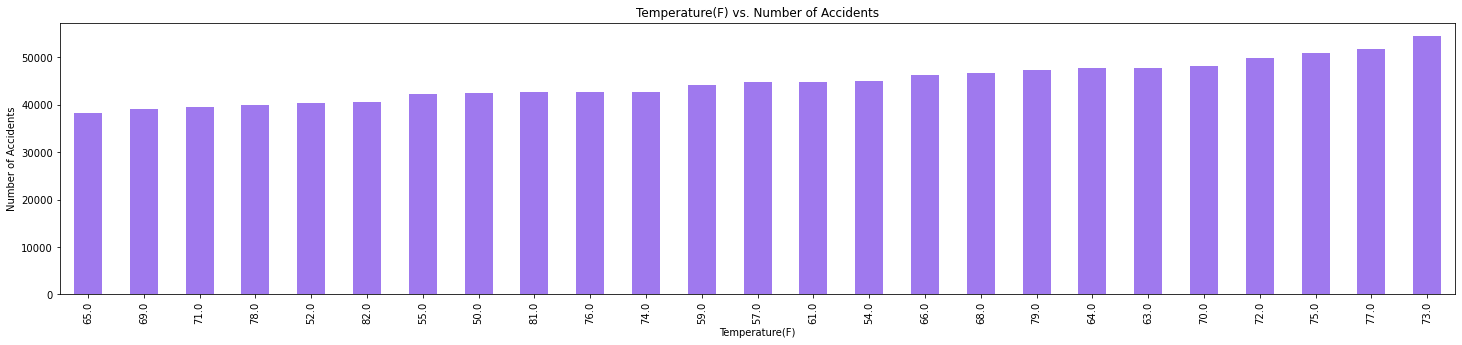

In [31]:
#temperature analysis, combined pre and during covid
temp.sort_values().plot(kind = 'bar', figsize=(25,5), color = '#9F79EE')
plt.title("Temperature(F) vs. Number of Accidents")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Accidents")
plt.savefig("Temperature(F) vs. Number of Accidents(bargraph).png")

In [32]:
#temperature, prioritizing top temperature values for analysis, before covid data
temp1 = q2_pre.Temperature.value_counts()
temp1 =temp1.head(25)

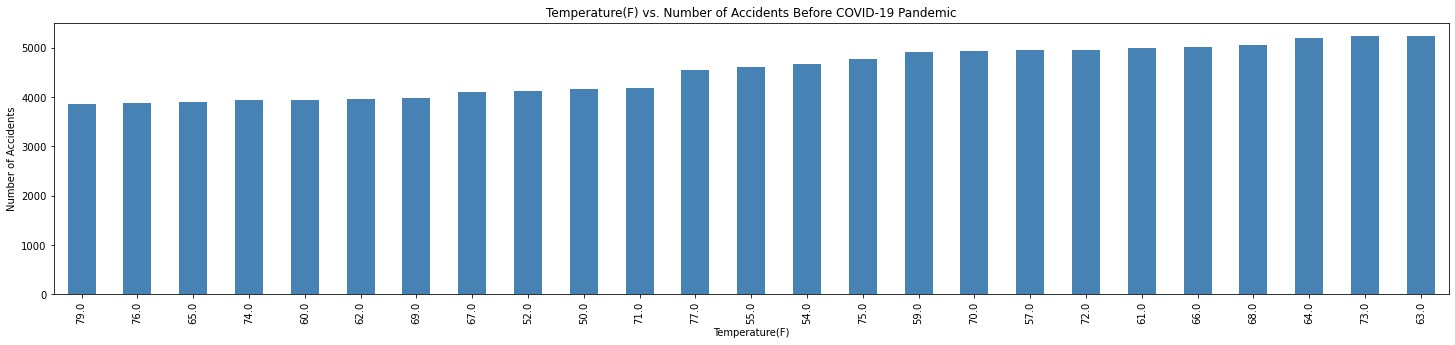

In [33]:
#temperature analysis, pre covid
temp1.sort_values().plot(kind = 'bar', figsize=(25,5), color = '#4682B4')
plt.title("Temperature(F) vs. Number of Accidents Before COVID-19 Pandemic")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Accidents")
plt.savefig("Temperature(F) vs. Number of Accidents(bargraph) Before COVID-19 Pandemic.png")

In [34]:
#temperature, prioritizing top temperature values for analysis, during covid data
temp2 = q2_dur.Temperature.value_counts()
temp2 =temp2.head(25)

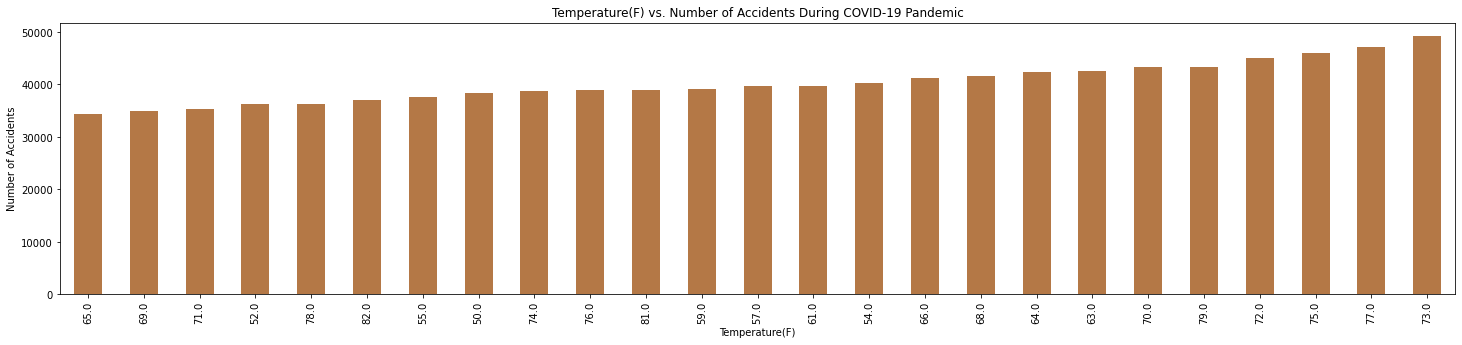

In [35]:
#temperature analysis, during covid
temp2.sort_values().plot(kind = 'bar', figsize=(25,5), color = '#B47846')
plt.title("Temperature(F) vs. Number of Accidents During COVID-19 Pandemic")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Accidents")
plt.savefig("Temperature(F) vs. Number of Accidents(bargraph) During COVID-19 Pandemic.png")

Question 3: How did US traffic accidents trend change before and during Covid-19 in different regions (cities and timezones)?

In [15]:
# Question # 3 - Accident trends by region (cities and timezones)
# load location data
location_df = pd.read_csv('Q3_location_data.csv')
location_df.head()

,Unnamed: 0,ID,State,City,Timezone,End_Lat,End_Lng,Year
0,224945,A-224946,MA,East Boston,US/Eastern,42.383346,-71.021204,2021
1,224946,A-224947,CA,Salyer,US/Pacific,40.904856,-123.740056,2021
2,224947,A-224948,MD,Bethesda,US/Eastern,38.973149,-77.121876,2021
3,224948,A-224949,WA,Seattle,US/Pacific,47.643411,-122.308460,2021
4,224949,A-224950,CA,Mountain View,US/Pacific,37.410966,-122.076087,2021


In [16]:
# subset location data pre-covid data
df_prepan = location_df.loc[(location_df['Year'] <= 2019)]

# Subset location data after covid started
df_pan =location_df.loc[(location_df['Year'] > 2019)]


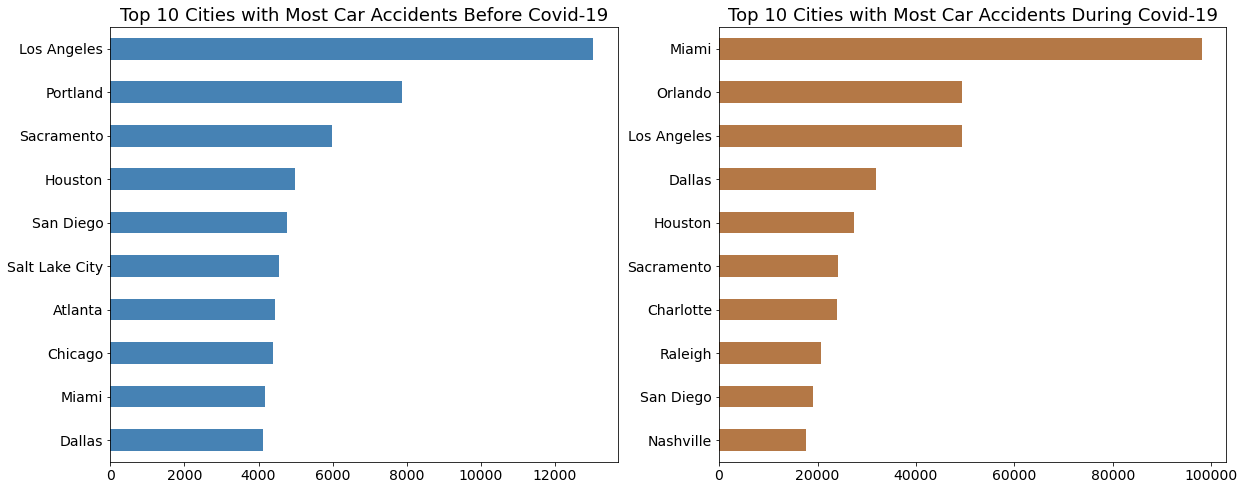

In [17]:
# Plot the top 10 cities with the most accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

# Top 10 cities with most car accidents pre-covid
df_prepan['City'].value_counts()[:10].plot.barh(fontsize = 14, color='#4682B4', ax = ax1).invert_yaxis()
ax1.set_title('Top 10 Cities with Most Car Accidents Before Covid-19', fontsize = 18)

# Top 10 cities with most car accidents after-covid
df_pan['City'].value_counts()[:10].plot.barh(fontsize = 14, color='#B47846', ax = ax2).invert_yaxis()
ax2.set_title('Top 10 Cities with Most Car Accidents During Covid-19', fontsize = 18)

plt.show()

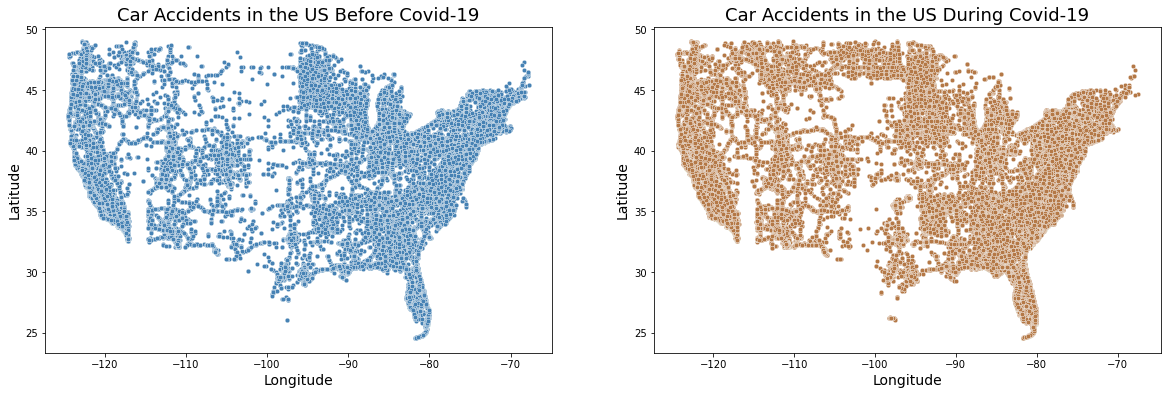

In [18]:
# Maps of car accidents pre vs during covid
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
# pre-covid
sns.scatterplot(x= df_prepan.End_Lng, y=df_prepan.End_Lat , color='#4682B4', s=20, ax=ax1)
ax1.set_title('Car Accidents in the US Before Covid-19', fontsize = 18)
ax1.set_xlabel("Longitude", fontsize = 14)
ax1.set_ylabel("Latitude", fontsize = 14)
# after covid
sns.scatterplot(x= df_pan.End_Lng, y=df_pan.End_Lat , color='#B47846', s=20, ax = ax2)
ax2.set_title('Car Accidents in the US During Covid-19', fontsize = 18)
ax2.set_xlabel("Longitude", fontsize = 14)
ax2.set_ylabel("Latitude", fontsize = 14)

plt.show()

In [19]:
# Plot accidents by different timezones

# Count number of accidents for each timezone before covid
timezone_pre = pd.DataFrame(df_prepan.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"Pre_covid_Cases"})

# Count number of accidents for each timezone after covid
timezone_pan = pd.DataFrame(df_pan.Timezone.value_counts()).reset_index().rename(columns={"index":"Timezone","Timezone":"During_covid_Cases"})

# merge the two dataframes
accidents_by_timezone = pd.merge(timezone_pre, timezone_pan, on="Timezone")
accidents_by_timezone

,Timezone,Pre_covid_Cases,During_covid_Cases
0,US/Pacific,200668,684986
1,US/Eastern,118087,980692
2,US/Central,64079,356706
3,US/Mountain,37884,112753


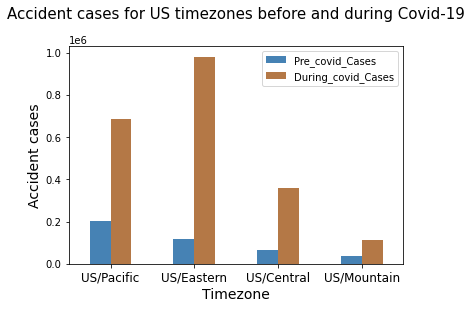

In [20]:
# Plot accidents by timezone
accidents_by_timezone.plot(x="Timezone", y = ["Pre_covid_Cases", "During_covid_Cases"], kind = "bar",
                          color=['#4682B4', '#B47846'])
plt.xticks(rotation = 0, size=12)
plt.xlabel("Timezone", size = 14)
plt.ylabel("Accident cases", size = 14)
plt.title("Accident cases for US timezones before and during Covid-19", size = 15, x=0.5, y=1.1)
plt.savefig("Accident_by_timezones.png", bbox_inches='tight', dpi=300)
plt.show()

Question 4: Are traffic accidents more likely to happend in the day time or night time and is there any difference in the patterns before and during Covid-19?

In [21]:
# Question # 4 - Effects of time of the day (day vs. night) on the number of accidents

time_df = pd.read_csv('Q4_Time_data.csv')
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556561 entries, 0 to 2556560
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      int64 
 1   ID              object
 2   Time            object
 3   Sunrise_Sunset  object
 4   Year            int64 
dtypes: int64(2), object(3)
memory usage: 97.5+ MB


In [23]:
# Splitting Time into hour, minute, and second 
time_df[['Hour', 'Minute', 'Sec']] = time_df['Time'].str.split(pat = ":", expand=True) 
time_df.head()

,Unnamed: 0,ID,Time,Sunrise_Sunset,Year,Hour,Minute,Sec
0,224945,A-224946,19:57:00,Night,2021,19,57,00
1,224946,A-224947,23:37:00,Night,2021,23,37,00
2,224947,A-224948,16:42:36,Day,2021,16,42,36
3,224948,A-224949,11:42:00,Day,2021,11,42,00
4,224949,A-224950,08:51:00,Day,2021,08,51,00


In [24]:
# Subset the dataframe into pre- and during Covid-19 dataframes
time_df_pre = time_df.loc[(time_df['Year'] <= 2019)]

# Subset time data for after covid started
time_df_during = time_df.loc[(time_df['Year'] > 2019)]

In [25]:
# Create a dataframe for the number of accidents happend in the daytime vs nighttime

# Count number of accidents for day vs night before covid
time_pre = pd.DataFrame(time_df_pre.Sunrise_Sunset.value_counts()).reset_index().rename(columns={"index":"Time of day","Sunrise_Sunset":"Pre_covid"})

# Count number of accidents for day vs night during covid
time_during = pd.DataFrame(time_df_during.Sunrise_Sunset.value_counts()).reset_index().rename(columns={"index":"Time of day","Sunrise_Sunset":"During_covid"})

# merge the two dataframes
accidents_by_time = pd.merge(time_pre, time_during, on="Time of day")
accidents_by_time

,Time of day,Pre_covid,During_covid
0,Day,290563,1311649
1,Night,131218,823131


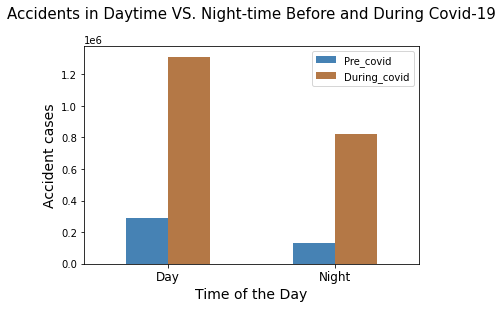

In [26]:
# Plot accidents by time of the day (day vs. night)
accidents_by_time.plot(x="Time of day", y = ["Pre_covid", "During_covid"], kind = "bar",
                          color=['#4682B4', '#B47846'])
plt.xticks(rotation = 0, size=12)
plt.xlabel("Time of the Day", size = 14)
plt.ylabel("Accident cases", size = 14)
plt.title("Accidents in Daytime VS. Night-time Before and During Covid-19", size = 15, x=0.5, y=1.1)
#plt.savefig("Accident_by_time.png", bbox_inches='tight', dpi=300)
plt.show()

What hour of the day are accidents more likely to happen? Any difference before and during Covid-19?

In [27]:
# Create a dataframe for the number of accidents by each hour of the day

# Count the number of accidents by hour for pre-covid data
count_hour_pre = pd.DataFrame(time_df_pre.Hour.value_counts()).reset_index().rename(columns={"index":"hour","Hour":"Pre_covid_count"}).sort_values(by=["hour"])

# Count the number of accidents by hour for during-covid data
count_hour_during = pd.DataFrame(time_df_during.Hour.value_counts()).reset_index().rename(columns={"index":"hour","Hour":"During_covid_count"}).sort_values(by=["hour"])

# merge the two count_by_hour dataframes
accidents_by_hour = pd.merge(count_hour_pre, count_hour_during, on="hour")
accidents_by_hour

,hour,Pre_covid_count,During_covid_count
0,00,7203,57828
1,01,4697,51620
2,02,5054,47310
3,03,4823,40137
4,04,5465,42154
5,05,11109,60968
6,06,19169,77533
7,07,26755,87923
8,08,28378,80680
9,09,22836,69610


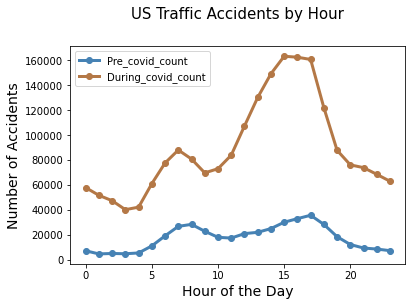

In [32]:
# Plot the number of accidents by hour

plt.plot(accidents_by_hour['Pre_covid_count'], label='Pre_covid_count', color = '#4682B4', linewidth = 3, marker = "o")
plt.plot(accidents_by_hour['During_covid_count'], label='During_covid_count', color = '#B47846', linewidth = 3, marker = "o")
plt.legend()
plt.title("US Traffic Accidents by Hour", size = 15, x=0.5, y=1.1)
plt.xlabel("Hour of the Day", fontsize = 14)
plt.ylabel("Number of Accidents", fontsize = 14)
#plt.savefig("Accidents_by_hour.png", bbox_inches='tight', dpi=300)

plt.show()